# Density-Based Clustering

**CS5483 Data Warehousing and Data Mining**
$\def\abs#1{\left\lvert #1 \right\rvert}
\def\Set#1{\left\{ #1 \right\}}
\def\mc#1{\mathcal{#1}}
\def\M#1{\boldsymbol{#1}}
\def\R#1{\mathsf{#1}}
\def\RM#1{\boldsymbol{\mathsf{#1}}}
\def\op#1{\operatorname{#1}}
\def\E{\op{E}}
\def\d{\mathrm{\mathstrut d}}
$
___

$\def\abs#1{\left\lvert #1 \right\rvert}
\def\Set#1{\left\{ #1 \right\}}
\def\mc#1{\mathcal{#1}}
\def\M#1{\boldsymbol{#1}}
\def\R#1{\mathsf{#1}}
\def\RM#1{\boldsymbol{\mathsf{#1}}}
\def\op#1{\operatorname{#1}}
\def\E{\op{E}}
\def\d{\mathrm{\mathstrut d}}
$

In [1]:
%reset -f
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.cluster import DBSCAN, OPTICS
# produce vector inline graphics
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg')
from ipywidgets import interact
import ipywidgets as widgets
from scipy.optimize import linear_sum_assignment
import seaborn as sns

## DBSCAN with scikit-learn

[DBSCAN (Density-based spatial clustering of applications with noise)](https://en.wikipedia.org/wiki/DBSCAN) is a clustering algorithm that identifies clusters as regions of densely populated instances. It makes use of two main parameters $\varepsilon$ and $\op{MinPts}$ to define how dense is dense.

We will create synthetic datasets using the [sample generators](https://scikit-learn.org/stable/modules/classes.html#samples-generator) of `sklearn`. In particular, we first create spherical clusters using [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs):

In [2]:
def XY2df(X, Y):
    '''Return a DataFrame for 2D data with 2 input features X and a target Y.'''
    df = pd.DataFrame(columns=['feature1', 'feature2', 'target'])
    df['target'] = Y
    df[['feature1', 'feature2']] = X
    return df

In [ ]:
@interact
def generate_blobs(n_samples=widgets.IntSlider(value=200,
                                               min=10,
                                               max=1000,
                                               continuous_update=False),
                   centers=widgets.IntSlider(value=3,
                                             min=1,
                                             max=4,
                                             continuous_update=False),
                   cluster_std=widgets.FloatSlider(value=0.5,
                                                   min=0,
                                                   max=5,
                                                   step=0.1,
                                                   continuous_update=False)):
    df = XY2df(*datasets.make_blobs(n_samples=n_samples,
                                    centers=centers,
                                    cluster_std=cluster_std,
                                    random_state=0))
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    sns.scatterplot(data=df, x='feature1', y='feature2', hue='target', ax=ax)

We will use the dataset `df_spherical` created with the default parameters specified above:

In [3]:
df_spherical = XY2df(*datasets.make_blobs(
    n_samples=200, centers=3, cluster_std=0.5, random_state=0))

To create non-spherical clusters, one way is to use [`sklearn.datasets.make_circle`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html).

In [4]:
df_nonspherical = XY2df(*datasets.make_circles(
    n_samples=200, factor=.1, noise=.1, random_state=0))

**Exercise** Complete the following code by assigning `X` and `Y` to the respective arrays of input features and target generated using [`sklearn.datasets.make_circle`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). Set `random_state=0` and use the parameters `n_samples`, `factor`, and `noise` specified by the widgets.

In [ ]:
import seaborn as sns


@interact
def generate_circles(n_samples=widgets.IntSlider(value=200,
                                                 min=10,
                                                 max=1000,
                                                 continuous_update=False),
                     factor=widgets.FloatSlider(value=0.1,
                                                min=0,
                                                max=0.99,
                                                step=0.01,
                                                continuous_update=False),
                     noise=widgets.FloatSlider(value=0.1,
                                               min=0,
                                               max=1,
                                               step=0.1,
                                               continuous_update=False)):
    df = pd.DataFrame(columns=['feature1', 'feature2', 'target'])
    # YOUR CODE HERE
    raise NotImplementedError()
    df['target'] = Y
    df[['feature1', 'feature2']] = X
    fig, ax = plt.subplots()
    ax.set_aspect('equal')
    sns.scatterplot(data=df, x='feature1', y='feature2', hue='target', ax=ax)

To normalize the features followed by [DBSCAN](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html), we create a pipeline as follows:

In [5]:
from sklearn.cluster import DBSCAN

dbscan_minmax_normalized = make_pipeline(preprocessing.MinMaxScaler(), 
                                         DBSCAN(eps=0.3, min_samples=3))
dbscan_minmax_normalized

Pipeline(steps=[('minmaxscaler', MinMaxScaler()),
                ('dbscan', DBSCAN(eps=0.3, min_samples=3))])

To generate the clustering solution, we can again use the `fit_predict` method as follows:

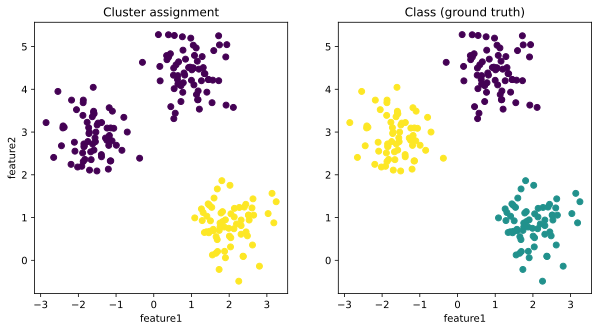

In [6]:
feature1, feature2 = df_spherical.columns[0:2]

cluster_labels = dbscan_minmax_normalized.fit_predict(
    df_spherical[[feature1, feature2]])

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(df_spherical[feature1], df_spherical[feature2], c=cluster_labels)
plt.title("Cluster assignment")
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.subplot(122)
plt.scatter(df_spherical[feature1],
            df_spherical[feature2],
            c=df_spherical['target'])
plt.title("Class (ground truth)")
plt.xlabel(feature1)
plt.show()

**Exercise** The clustering solution above is not correct because the points at the top (`feature2 > 2`) have the same cluster label but they may belong to two different classes. Explain how we should change the parameters, `eps = 0.3` and `min_samples = 3`, to improve the solution. Note that the pairwise distance of points in different clusters appear to be larger than 1. 

YOUR ANSWER HERE

**Exercise** Complete the following code so to apply DBSCAN to the different datasets with different choices of parameters.

In [ ]:
@interact(cluster_shape=['spherical', 'non-spherical'],
          eps=widgets.FloatSlider(value=0.3,
                                  min=0.01,
                                  max=1,
                                  step=0.01,
                                  continuous_update=False),
          min_samples=widgets.IntSlider(value=3,
                                        min=1,
                                        max=10,
                                        continuous_update=False))
def cluster_regions_dbscan(cluster_shape, eps, min_samples):
    df = {
        'spherical': df_spherical,
        'non-spherical': df_nonspherical
    }[cluster_shape]
    feature1, feature2 = df.columns[0:2]
    # YOUR CODE HERE
    raise NotImplementedError()
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    plt.scatter(df[feature1], df[feature2], c=cluster_labels)
    plt.title("Cluster assignment")
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.subplot(122)
    plt.scatter(df[feature1], df[feature2], c=df['target'])
    plt.title("Class (ground truth)")
    plt.xlabel(feature1)
    plt.show()

**Exercise** It is possible tune `eps` to cluster the generated datasets correctly with `min_samples = 1`, which simplifies to the single-linkage algorithm?

YOUR ANSWER HERE

## OPTICS with Weka

We will use the package `optics_dbScan` in Weka for density-based clustering algorithms. The package can be installed from Weka GUI -> `tools` -> `Package manager`.

Instead of using the Weka package manager to install `optics_dbScan`, you can also install it by creating a symbolic link as follows and from Weka from JupyterHub `Xpra desktop service`:

In [ ]:
if input('Create symlink to Weka packages for this notebook? [Y/n]').lower() != 'n':
    !mkdir -p ~/wekafiles/packages/
    !ln -s /home/course/cs5483/wekafiles/packages/optics_dbScan ~/wekafiles/packages/

Open the explorer interface and load the `iris.arff` dataset (not `iris.2D.arff`). Under the `Cluster` panel:
    
1. Choose `OPTICS` as the `Clusterer`.
1. Choose `Use training set` as the `Cluster mode`.
1. Ignore the `class` attribute using the `Ignore attributes` button.
1. Click `Start`.

The OPTICS Visualizer will appear. The `Table` tab shows the list of data points in the order visited by the algorithm. The order of visit is based on a priority queue that prioritize a point $\M{q}$ with smaller

\begin{align}
\op{reachability-distance}(\M{q}) &:= \max \Set{\op{dist}(\M{p}, \M{q}), \op{core-distance}(\M{p})} \quad \text{where}\\
\op{core-distance}(\M{p}) &:= \min\Set{0\leq \varepsilon' \leq \varepsilon| |D\cap N_{\varepsilon'}(\M{p})|\geq \op{MinPts}} 
\end{align}

and $\M{p}$ is a core point, i.e.,

\begin{align}
|D\cap N_{\varepsilon}(\M{p})|\geq \op{MinPts},
\end{align}

that is last visited before $\M{q}$. Both the reachability distance of $\M{q}$ and core distance of $\M{p}$ are undefined if $\M{p}$ does not exists or is not a core point.

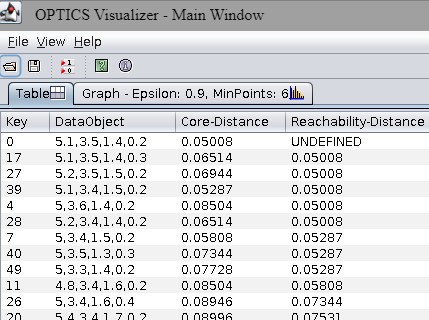

**Exercise** The reachability distance is always undefined for the first point visited. Why?

For the first point $\M{q}$ visited, there is no last visited point $\M{p}$ and so both the reachability distance is undefined.

The `Graph` tab shows the stem plots of core and reachability distances. Change the `General Settings` to give the reachability plot below:

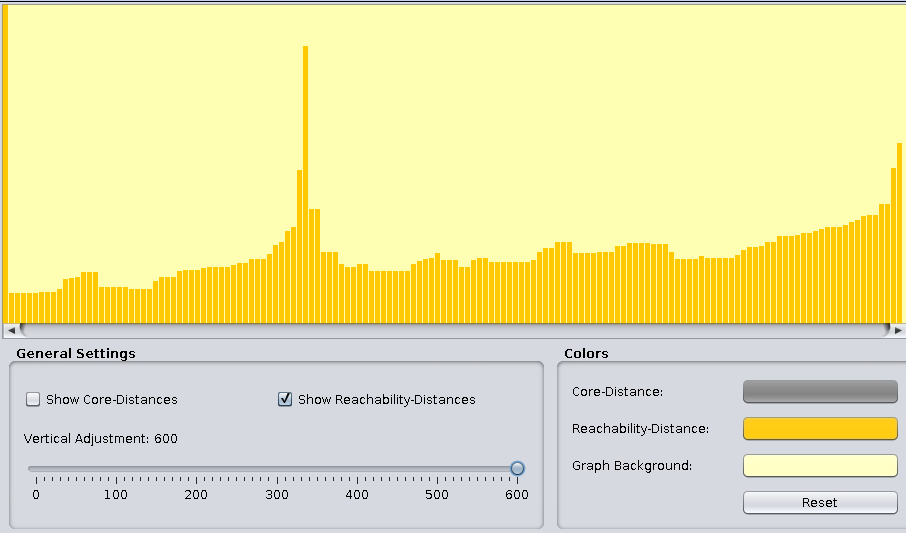

The above stem plot is called the reachability plot. To obtain a cluster from the plot, 

1. specify a threshold to clip the reachability distance from above, and
1. identify a cluster as a "valley" of consecutively visited points with reachability distances below the threshold, except for 1. the first point which should have a reachability distance above the threshold.
1. All other points not assigned to a cluster are regarded as noise.

**Exercise** Assign to `eps_cl` a threshold value that can results in $2$ clusters and no noise points.

*Hint*: You can see the reachability distance of a stem in the reachability plot by hovering the mouse over the stem.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
eps_cl

**Exercise** Assign to `eps_cl` a threshold value that results in $3$ clusters. In particular, choose the threshold value that leads to as few noise points as possible.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
eps_cl

**Exercise** To evaluate the 3 clusters obtained from a particular threshold using an extrinsic measure, run DBSCAN with 
- the parameter `epsilon` set to the threshold you obtained and
- Cluster mode set to `Classes to clusters evaluation`.

Assign to `error_rate` the fraction of incorrectly classified instances and `miss_rate` as the fraction of instances not assigned to a cluster.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()
error_rate, miss_rate

**Exercise** From the plot below, explain why there is an error in the implementation of OPTICS in `optics_dbScan`.

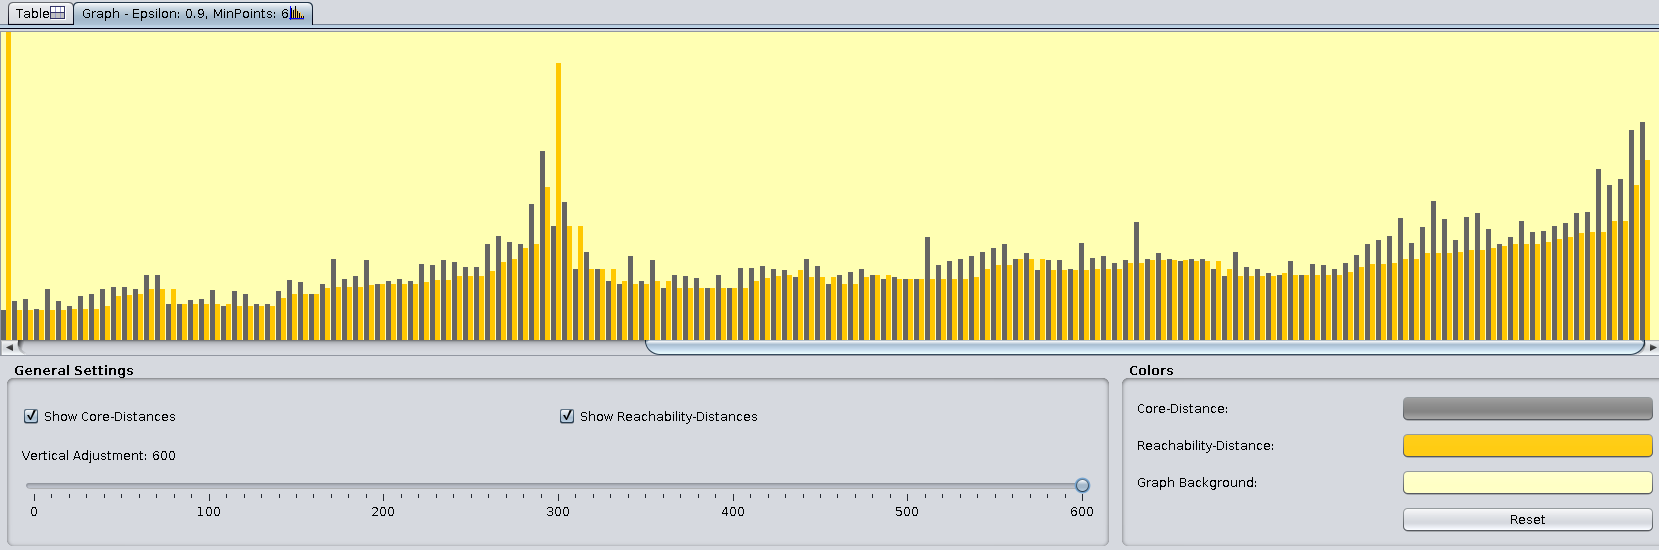

By definition, $\op{reachability-distance}(\M{q}) \geq \op{core-distance(\M{p})}$, which does not hold for some of the points above such as the last point.